## Importa bibliotecas

In [2]:
# !pip3 install wordcloud
# !conda install wordcloud -y

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Importa dados

In [3]:
# https://www.kaggle.com/luisfredgs/imdb-ptbr?select=imdb-reviews-pt-br.csv
resenhas = pd.read_csv("imdb-reviews-pt-br.csv")
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenhas.text_pt, 
                                                              resenhas.sentiment,
                                                              random_state=42)


In [5]:
regressao_logistica = LogisticRegression()

regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [6]:
print("resenha negativa:")
negativas = resenhas.query("sentiment == 'neg'")
negativas.text_pt[0]

resenha negativa:


'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [7]:
print("resenha positiva:")
positivas = resenhas.query("sentiment == 'pos'")
positivas.text_pt[12389]

resenha positiva:


'Eu fui e vi este filme ontem à noite depois de ser persuadido por alguns amigos meus. Eu admitiria que estava relutante em vê-lo porque, pelo que eu sabia de Ashton Kutcher, ele só conseguia fazer comédia. Eu estava errado. Kutcher interpretou o personagem de Jake Fischer muito bem, e Kevin Costner interpretou Ben Randall com tal profissionalismo. O sinal de um bom filme é que ele pode brincar com nossas emoções. Este fez exatamente isso. Todo o teatro que foi vendido foi superado pelo riso durante a primeira metade do filme, e foi levado às lágrimas durante o segundo semestre. Ao sair do teatro, eu não só vi muitas mulheres em lágrimas, mas também muitos homens adultos, tentando desesperadamente não deixar ninguém vê-los chorando. Este filme foi ótimo, e eu sugiro que você vá vê-lo antes de julgar.'

In [8]:
resenhas.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [9]:
classificacao = resenhas.sentiment.replace(["neg", "pos"], [0, 1])
classificacao.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [10]:
classificacao.tail()

49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, dtype: int64

In [11]:
resenhas["classificacao"] = classificacao
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [12]:
resenhas.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [13]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_woords = vetorizar.fit_transform(texto)
bag_of_woords

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [15]:
matriz_esparsa = pd.SparseDataFrame(bag_of_woords,
                                    columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


In [16]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)
bag_of_words.shape

(49459, 156923)

In [17]:
# usa max_features
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)
bag_of_words.shape

(49459, 50)

In [18]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              classificacao,
                                                              random_state=42)

regressao_logistica = LogisticRegression()

regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(f"acuracia: {acuracia * 100} %")

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acuracia: 65.83097452486858 %


In [19]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                  texto[coluna_classificacao],
                                                                  random_state=42)

    
    regressao_logistica = LogisticRegression()

    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [20]:
acuracia = classificar_texto(resenhas, "text_pt", "classificacao")
print(f"acuracia: {acuracia * 100} %")

acuracia: 65.83097452486858 %


In [26]:
todas_palavras = " ".join([texto for texto in resenhas.text_pt])
len(todas_palavras)

63448424

In [27]:
nuvem_palavras = WordCloud().generate(todas_palavras)
nuvem_palavras

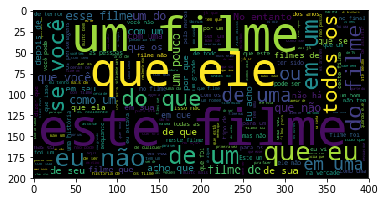

In [29]:
plt.figure()

plt.imshow(nuvem_palavras)
plt.show()